# ML Project PCA

# Name: Jamiu Olashile Salimon

# ID: 19063679

# Module: CS6502 - Applied Big Data And Visualization

# Imports

In [1]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# loading the dataset as pandas chicago_taxi_dataset from csv file and duplicate.

# Use this on Google Colab after uploading csv file.
# chicago_taxi_dataset = pandas.read_csv("/content/chicago-taxi-trips-dataset-first-1000-row-order-by.csv")

# Use this on local machine
chicago_taxi_dataset = pandas.read_csv("./chicago-taxi-trips-dataset-first-1000-row-order-by.csv")

chicago_taxi_dataset_original = chicago_taxi_dataset.copy()

# Feature Information
## Input
- trip_start_time_day_of_week: The day of the week the trip started
- trip_start_time_hour: The hour the trip started
- trip_end_time_day_of_week: The day of the week the trip ended
- trip_end_time_hour: The hour the trip ended
- trip_seconds: Time of the trip in seconds.
- trip_miles: Distance of the trip in miles.
- pickup_census_tract & dropoff_census_tract: The Census Tract where the trip began.
- pickup_community_area & dropoff_community_area: The Community Area where the trip began/ended.
- tips: The tip for the trip.
- tolls: The tolls for the trip.
- extras: Extra charges for the trip.
- trip_total: Total cost of the trip, the total of the fare, tips, tolls, and extras.
- payment_type: Type of payment for the trip.
- company: The taxi company.
- pickup_latitude, pickup_longitude, dropoff_latitude, and dropoff_longitude: The latitude and longitude of the center of the pickup/dropoff census tract or the community area.
- pickup_location & dropoff_location: The location of the center of the pickup & dropoff census tract or the community area if the census tract has been hidden for privacy.

## Output
- fare: The fare for the trip.


# EDA

In [59]:
# displaying data details & checking for nan/null/inf values
chicago_taxi_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   trip_start_time_day_of_week  1000 non-null   int64  
 1   trip_start_time_hour         1000 non-null   int64  
 2   trip_end_time_day_of_week    1000 non-null   int64  
 3   trip_end_time_hour           1000 non-null   int64  
 4   trip_seconds                 994 non-null    float64
 5   trip_miles                   1000 non-null   float64
 6   pickup_census_tract          648 non-null    float64
 7   dropoff_census_tract         592 non-null    float64
 8   pickup_community_area        927 non-null    float64
 9   dropoff_community_area       854 non-null    float64
 10  fare                         1000 non-null   float64
 11  tips                         1000 non-null   float64
 12  tolls                        1000 non-null   float64
 13  extras             

In [60]:
chicago_taxi_dataset.head()

,trip_start_time_day_of_week,trip_start_time_hour,trip_end_time_day_of_week,trip_end_time_hour,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,3,0,3,0,660.0,2.26,NaN,NaN,NaN,NaN,8.65,0.0,0.0,0.0,8.65,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0,3,0,480.0,0.10,1.703108e+10,1.703128e+10,8.0,28.0,8.05,0.0,0.0,2.5,10.55,Cash,Taxi Affiliation Services,41.891972,-87.612945,POINT (-87.6129454143 41.8919715078),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)
2,3,0,3,0,660.0,6.95,NaN,NaN,NaN,NaN,16.25,0.0,0.0,0.0,16.25,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,3,0,1380.0,10.30,1.703184e+10,1.703103e+10,32.0,77.0,22.85,0.0,0.0,0.0,22.85,Cash,NaN,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.986953,-87.672081,POINT (-87.6720809941 41.9869530579)
4,3,0,3,0,360.0,0.00,1.703183e+10,1.703128e+10,28.0,28.0,6.45,0.0,0.0,1.5,7.95,No Charge,Dispatch Taxi Affiliation,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)


In [61]:
chicago_taxi_dataset.tail()

,trip_start_time_day_of_week,trip_start_time_hour,trip_end_time_day_of_week,trip_end_time_hour,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
995,3,0,3,0,120.0,0.90,1.703107e+10,1.703107e+10,7.0,7.0,4.84,0.0,0.0,3.0,7.84,Cash,NaN,41.929047,-87.651311,POINT (-87.6513108767 41.9290469366),41.921778,-87.651062,POINT (-87.6510618838 41.9217781876)
996,3,0,3,0,1140.0,5.30,1.703184e+10,1.703106e+10,32.0,6.0,16.05,0.0,0.0,0.0,16.05,Cash,NaN,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.938391,-87.638575,POINT (-87.6385749205 41.938391257700005)
997,3,0,3,0,240.0,1.07,1.703132e+10,NaN,32.0,NaN,5.65,0.0,0.0,1.0,6.65,Cash,NaN,41.870607,-87.622173,POINT (-87.6221729369 41.8706073724),NaN,NaN,NaN
998,3,0,3,0,420.0,1.20,1.703132e+10,1.703108e+10,32.0,8.0,6.45,0.0,0.0,2.0,8.45,Cash,NaN,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495)
999,3,0,3,0,540.0,2.06,1.703107e+10,1.703108e+10,7.0,8.0,7.85,0.0,0.0,1.0,8.85,Cash,NaN,41.929263,-87.635891,POINT (-87.6358909539 41.9292629902),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259)


In [62]:
# displaying data stats for numerical features
chicago_taxi_dataset.describe()

,trip_start_time_day_of_week,trip_start_time_hour,trip_end_time_day_of_week,trip_end_time_hour,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.0,1000.0,1000.0,1000.000000,994.000000,1000.000000,6.480000e+02,5.920000e+02,927.000000,854.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,927.000000,927.000000,854.000000,854.000000
mean,3.0,0.0,3.0,0.007000,569.577465,2.706130,1.703122e+10,1.703123e+10,14.450917,16.522248,18.461490,0.446350,0.050000,1.100000,20.057840,41.912566,-87.649121,41.913567,-87.650406
std,0.0,0.0,0.0,0.094657,499.971422,6.511342,2.662770e+05,2.660685e+05,13.379230,15.670743,284.441533,2.244037,1.581139,3.885885,286.111737,0.030965,0.031833,0.035326,0.029825
min,3.0,0.0,3.0,0.000000,0.000000,0.000000,1.703103e+10,1.703103e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.778877,-87.913625,41.741243,-87.913625
25%,3.0,0.0,3.0,0.000000,300.000000,0.000000,1.703107e+10,1.703107e+10,7.000000,7.000000,5.450000,0.000000,0.000000,0.000000,6.650000,41.892042,-87.657233,41.892042,-87.663518
50%,3.0,0.0,3.0,0.000000,480.000000,1.140000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.650000,0.000000,0.000000,1.000000,9.050000,41.901207,-87.642649,41.901567,-87.646512
75%,3.0,0.0,3.0,0.000000,720.000000,3.000000,1.703128e+10,1.703132e+10,24.000000,24.000000,11.050000,0.000000,0.000000,1.500000,12.650000,41.936237,-87.631717,41.942322,-87.631864
max,3.0,0.0,3.0,2.000000,6600.000000,90.000000,1.703198e+10,1.703184e+10,77.000000,77.000000,9000.560000,63.560000,50.000000,90.000000,9050.560000,42.009623,-87.592311,42.009623,-87.551428


In [63]:
# calc variance for each numerical variable
chicago_taxi_dataset.var()

trip_start_time_day_of_week    0.000000e+00
trip_start_time_hour           0.000000e+00
trip_end_time_day_of_week      0.000000e+00
trip_end_time_hour             8.959960e-03
trip_seconds                   2.499714e+05
trip_miles                     4.239758e+01
pickup_census_tract            7.090345e+10
dropoff_census_tract           7.079247e+10
pickup_community_area          1.790038e+02
dropoff_community_area         2.455722e+02
fare                           8.090699e+04
tips                           5.035703e+00
tolls                          2.500000e+00
extras                         1.510010e+01
trip_total                     8.185993e+04
pickup_latitude                9.588334e-04
pickup_longitude               1.013319e-03
dropoff_latitude               1.247908e-03
dropoff_longitude              8.895545e-04
dtype: float64

Below are the inferences gotten from the stats above;

- Rows with missing values include; `trip_seconds`: 6, `pickup_census_tract`: 352, `dropoff_census_tract`: 408, `pickup_community_area`: 73, `dropoff_community_area`: 145, `company`: 635, `pickup_latitude`: 73, `pickup_longitude`: 73, `pickup_location`: 73, `dropoff_latitude`: 146, `dropoff_longitude`: 146 and `dropoff_location`: 146.
- `payment_type`, `company`, `pickup_location`, and `dropoff_location` are categorical features.
- Noted distribution are as follows;
    - Normal distribution: `trip_start_time_day_of_week`, `trip_end_time_day_of_week`, `pickup_census_tract`
    - Left skewed: `trip_end_time_day_of_week`,`trip_end_time_hour`, `extras`, `pickup_latitude`, `dropoff_latitude`
    - Right skewed: `trip_seconds`, `trip_miles`, `dropoff_census_tract`, `pickup_community_area`, `fare`, `tips`, `tolls`, `trip_total`, `pickup_longitude`, `dropoff_longitude`



In [0]:
# dropping rows with more than 30% non-null values and rows with non string or number.
labels_wf_missing_values = ['pickup_census_tract', 'dropoff_census_tract', 'company', 'pickup_location', 'dropoff_location']
chicago_taxi_dataset = chicago_taxi_dataset.drop(labels_wf_missing_values, axis=1)

## Numerical Features

### Check for distribution

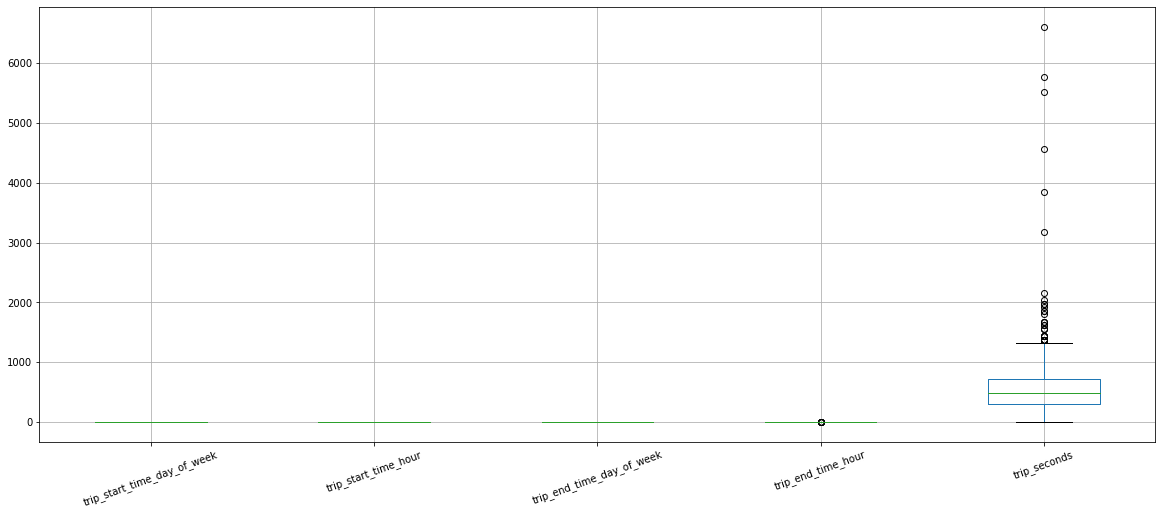

In [65]:
# Plot boxplot for numerical features
column = ['trip_start_time_day_of_week', 'trip_start_time_hour', 
          'trip_end_time_day_of_week', 'trip_end_time_hour', 'trip_seconds']
chicago_taxi_dataset.boxplot(column=column, figsize=(20,8), rot=20)
pyplot.show()

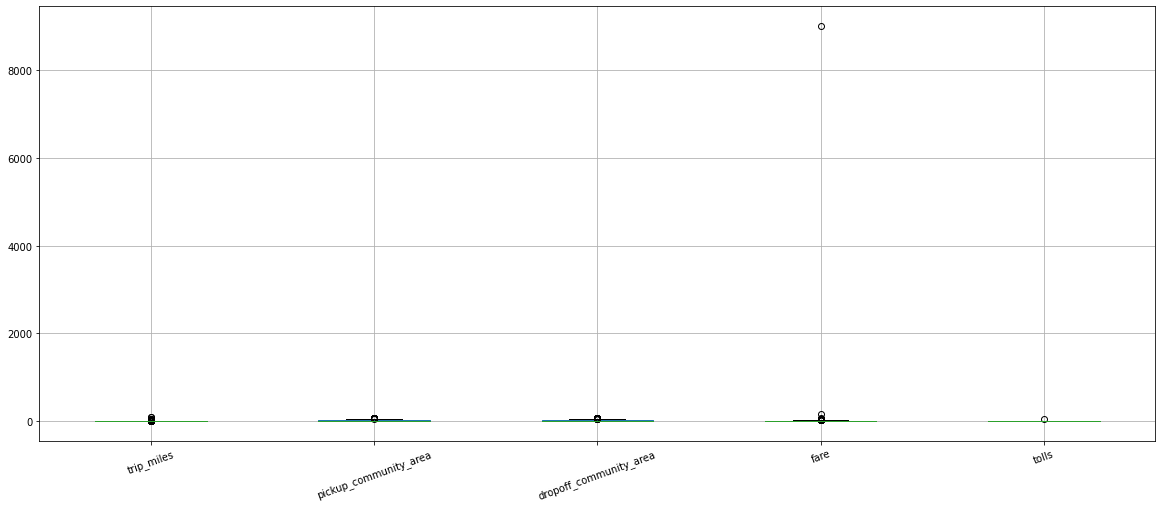

In [66]:
column = ['trip_miles', 'pickup_community_area', 'dropoff_community_area',
          'fare', 'tolls',]
chicago_taxi_dataset.boxplot(column=column, figsize=(20,8), rot=20)
pyplot.show()

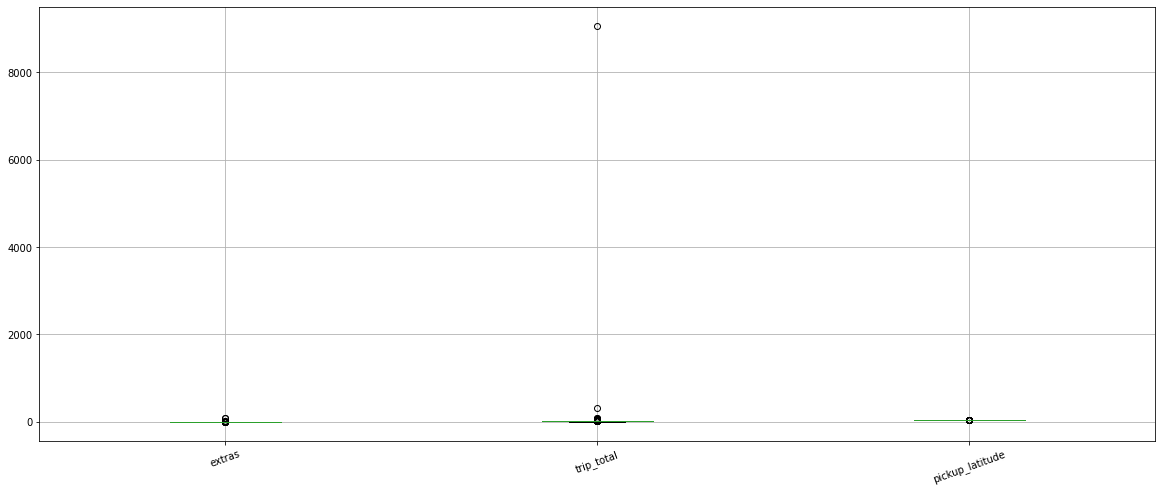

In [67]:
column = [ 'extras', 'trip_total', 'pickup_latitude']
chicago_taxi_dataset.boxplot(column=column, figsize=(20,8), rot=20)
pyplot.show()

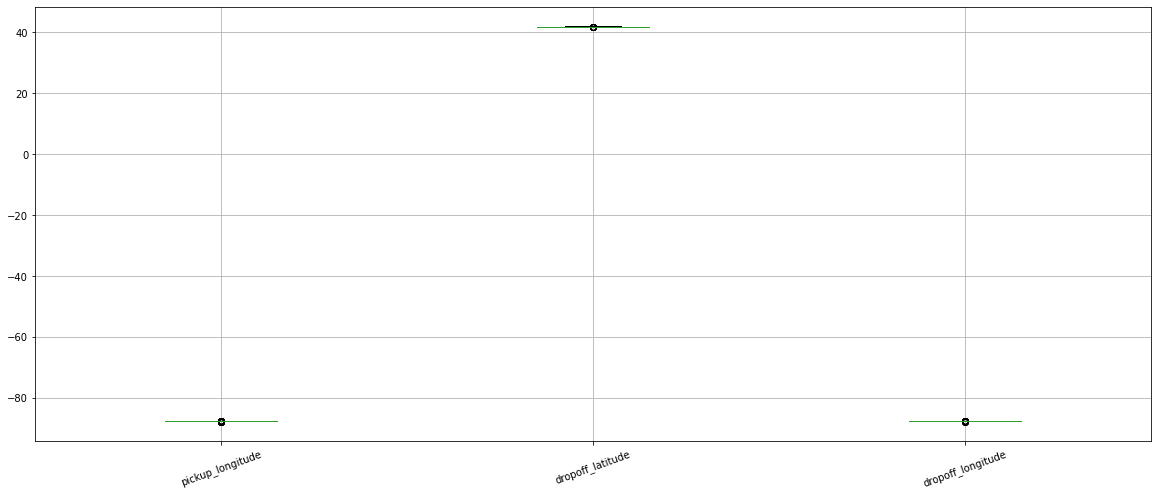

In [68]:
column = ['pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
chicago_taxi_dataset.boxplot(column=column, figsize=(20,8), rot=20)
pyplot.show()

- `trip_seconds` contains alot of outliers

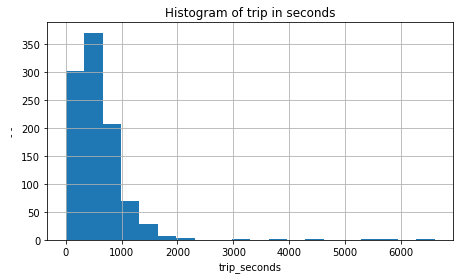

In [69]:
# Visualize distribution of trip_seconds using a barchart
fig = pyplot.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of trip in seconds")
ax1.set_xlabel('trip_seconds')
ax1.set_ylabel('- -')
chicago_taxi_dataset['trip_seconds'].hist(bins=20)

- `trip_seconds` is right skewed and the outliers are to the right.

### Check for trends

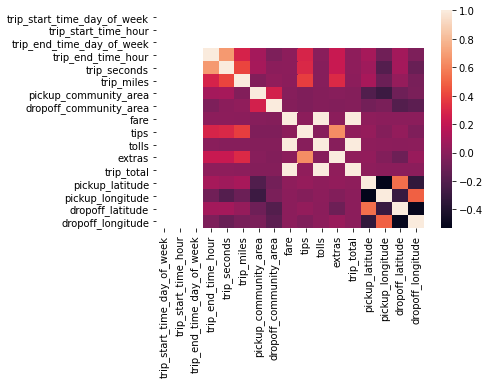

In [70]:
#heatmap of correlation matrix
sns.heatmap(chicago_taxi_dataset.corr());
# chicago_taxi_dataset.corr()

Correlation between;
- `tolls`, `trip_total`, and  `fare`

## Categorical features

In [0]:
# function to compose frequency table for categorical variables
def frequency_table(arr=[]):
  for value in arr:
    print(chicago_taxi_dataset[value].value_counts(normalize=True))
    print('\n')

In [73]:
cat_lables = ['payment_type']
frequency_table(cat_lables)

Cash           0.823
Credit Card    0.166
No Charge      0.008
Unknown        0.002
Dispute        0.001
Name: payment_type, dtype: float64




# Data preparation

## Impute Missing Values

In [0]:
def imput_missing_val(data, columns=[]):
  for column in columns:
    data[column].fillna(
      data[column].mean(), inplace=True
      )
  
  return data

In [0]:
# fill up missing values with the mean 
columns = ['trip_seconds', 'pickup_community_area', 'dropoff_community_area', 
           'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
           'dropoff_longitude']
chicago_taxi_dataset = imput_missing_val(chicago_taxi_dataset, columns=columns)

## Encode categorical features

In [84]:
# encode categorical features
chicago_taxi_dataset = pandas.get_dummies(chicago_taxi_dataset, columns=['payment_type'])
chicago_taxi_dataset

,trip_start_time_day_of_week,trip_start_time_hour,trip_end_time_day_of_week,trip_end_time_hour,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,payment_type_Cash,payment_type_Credit Card,payment_type_Dispute,payment_type_No Charge,payment_type_Unknown
0,3,0,3,0,660.0,2.26,14.450917,16.522248,8.65,0.0,0.0,0.0,8.65,41.912566,-87.649121,41.913567,-87.650406,1,0,0,0,0
1,3,0,3,0,480.0,0.10,8.000000,28.000000,8.05,0.0,0.0,2.5,10.55,41.891972,-87.612945,41.879255,-87.642649,1,0,0,0,0
2,3,0,3,0,660.0,6.95,14.450917,16.522248,16.25,0.0,0.0,0.0,16.25,41.912566,-87.649121,41.913567,-87.650406,1,0,0,0,0
3,3,0,3,0,1380.0,10.30,32.000000,77.000000,22.85,0.0,0.0,0.0,22.85,41.880994,-87.632746,41.986953,-87.672081,1,0,0,0,0
4,3,0,3,0,360.0,0.00,28.000000,28.000000,6.45,0.0,0.0,1.5,7.95,41.885281,-87.657233,41.879255,-87.642649,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,3,0,120.0,0.90,7.000000,7.000000,4.84,0.0,0.0,3.0,7.84,41.929047,-87.651311,41.921778,-87.651062,1,0,0,0,0
996,3,0,3,0,1140.0,5.30,32.000000,6.000000,16.05,0.0,0.0,0.0,16.05,41.880994,-87.632746,41.938391,-87.638575,1,0,0,0,0
997,3,0,3,0,240.0,1.07,32.000000,16.522248,5.65,0.0,0.0,1.0,6.65,41.870607,-87.622173,41.913567,-87.650406,1,0,0,0,0
998,3,0,3,0,420.0,1.20,32.000000,8.000000,6.45,0.0,0.0,2.0,8.45,41.884987,-87.620993,41.895033,-87.619711,1,0,0,0,0


## Scale numerical features

- Feature with outliers; Log and use RobustScaler  for scaling.
- Features without outliers; Use Standscaler for scaling.

In [85]:
# Get min values in trip_seconds
trip_seconds_min = chicago_taxi_dataset[['trip_seconds']].min() + 1
trip_seconds_min

trip_seconds    1.0
dtype: float64

In [0]:
# Log and scale trip_seconds
robust_scaler = RobustScaler()
logged_ts = numpy.log(chicago_taxi_dataset[['trip_seconds']] + trip_seconds_min)
chicago_taxi_dataset[['trip_seconds']] = robust_scaler.fit_transform(logged_ts)

In [0]:
# Scale other features
standard_scaler = StandardScaler()
features_to_scaled = ['trip_start_time_day_of_week',	'trip_start_time_hour',	'trip_end_time_day_of_week',
                     'trip_end_time_hour', 'trip_miles','pickup_community_area', 'tips',	'extras',
                      'trip_total', 'pickup_latitude','pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
chicago_taxi_dataset[features_to_scaled] = standard_scaler.fit_transform(chicago_taxi_dataset[features_to_scaled])

In [0]:
# check for null values
chicago_taxi_dataset.info()

In [0]:
# Represent dependent variable with y and independent variables with X
y = chicago_taxi_dataset['fare']
X = chicago_taxi_dataset.drop('fare', axis=1)

In [0]:
X

In [0]:
y

In [0]:
# a copy of list of column names
column_names = list(X.columns.values)

# PCA

In [93]:
# Initialize PCA without n_component given and fit with X
pca = PCA(iterated_power=7)
pca.fit(X)

PCA(copy=True, iterated_power=7, n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [94]:
# number of features
pca.n_components_

21

In [95]:
# output the amount of variance explained by each of the selected components
pca.explained_variance_

array([2.09826118e+02, 3.49921178e+00, 2.58779966e+00, 2.19364166e+00,
       1.79383840e+00, 1.16414048e+00, 8.23178990e-01, 7.57263084e-01,
       6.64654713e-01, 4.79522003e-01, 4.38568375e-01, 2.11717701e-01,
       1.54993478e-01, 1.22248448e-02, 2.67677792e-03, 1.17221202e-03,
       2.02361914e-04, 6.79706538e-32, 1.65071029e-32, 1.61272429e-33,
       0.00000000e+00])

In [96]:
# output the percentage of variance explained by each of the selected components. It should sum up approximately 1.
pca.explained_variance_ratio_

array([9.34175924e-01, 1.55789919e-02, 1.15212546e-02, 9.76640681e-03,
       7.98642542e-03, 5.18292009e-03, 3.66491074e-03, 3.37144369e-03,
       2.95913796e-03, 2.13490062e-03, 1.95256921e-03, 9.42597520e-04,
       6.90053160e-04, 5.44267595e-05, 1.19173986e-05, 5.21885579e-06,
       9.00944218e-07, 3.02615084e-34, 7.34919861e-35, 7.18007946e-36,
       0.00000000e+00])

In [97]:
explained_variance_ratio = pca.explained_variance_ratio_
len(explained_variance_ratio)

21

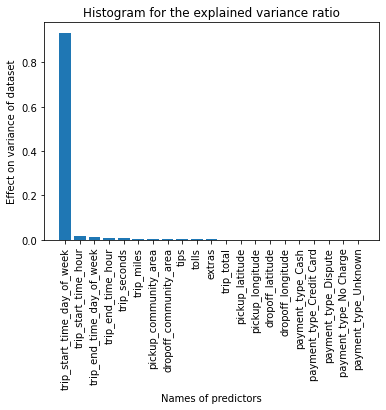

In [98]:
# Plot explained variane ratio with a bar chart
pyplot.xticks(range(len(explained_variance_ratio)), column_names)
pyplot.xlabel('Names of predictors')
pyplot.ylabel('Effect on variance of dataset')
pyplot.title('Histogram for the explained variance ratio')
pyplot.xticks(rotation=90)
pyplot.
pyplot.bar(range(len(explained_variance_ratio)), explained_variance_ratio) 
pyplot.show()

Features to be used for predictive analysis on Big Query based on their effect on the variance of the dataset include:
- `trip_start_time_day_of_week`: 93.4%
- `trip_start_time_hour`: 1.55%
- `trip_end_time_day_of_week`: 1.15%
- `trip_end_time_hour`: 0.97%
- `trip_seconds`: 0.79%
- `trip_miles`: 0.51%
- `pickup_community_area`: 0.36%
- `dropoff_community_area`: 0.34%
- `tips`: 0.29%
- `tolls`: 0.21%
- `extras`: 0.19%

Additional feature(s);
- `trip_total`: It strongly correlates with the target variable even though it only has 0.09% effect on the variance of the dataset.

All in all, the features selected have a total of 99.85% effect on the variance of the dataset.

